In [13]:
### imports
import pandas as pd
import matplotlib.pyplot as plt

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [14]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [15]:
import pandas as pd
data = pd.read_csv("data/data_000637.txt")
df = pd.DataFrame(data)
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [16]:
x = max(df["BX_COUNTER"]) + 1 # we are assuming that in more than one million entries we should be able to catch the maximum possible BX value (which is reasonably in a rectangular distribution as a time measurement is)
print(x)

3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [17]:
timens = df["TDC_MEAS"] * 25. / 30. + df["BX_COUNTER"] * 25 + df["ORBIT_CNT"] * x * 25 # absolute time of the moment of every data acquistion
ttimens = timens[len(timens)-1]-timens[0] # total time from the first to the last acquisition
ttime = ttimens / 1e9 # convert to sec

if (ttime / 3600 >= 1):
    hours = divmod(ttime/3600, 1)[0]
else:
    hours = 0
if ((ttime-hours*3600) / 60 >= 1):
    minutes = divmod(ttime/60, 1)[0]
else:
    minutes = 0


seconds = ttime - hours*3600 - minutes*60

print("time in nanoseconds: ", ttimens)
print("time in seconds: ", ttimens/1e9)
print("time in hh/mm/ss: %2i/%2i/%2.3f" % (hours, minutes, seconds))

time in nanoseconds:  980416093.3125
time in seconds:  0.9804160933125
time in hh/mm/ss:  0/ 0/0.980


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [18]:
df["TIMENS"] = timens
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIMENS
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [19]:
df_grouped = df.groupby("TDC_CHANNEL").count()
df_sorted = df_grouped.sort_values(by = "HEAD", ascending = False)

print("The noisiest channels are:")
print(*df_sorted.index.values[0:3])
print("with a number of counts, respectively, of:")
print(*df_sorted.iloc[0:3]["HEAD"])


The noisiest channels are:
139 64 63
with a number of counts, respectively, of:
108059 66020 64642


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [20]:
df_grouped = df.groupby("ORBIT_CNT").count()

print(len(df_grouped.index))
print(len(df_grouped["TDC_CHANNEL"].index[df_grouped["TDC_CHANNEL"]==139]))

11001
69


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

(array([8.3077e+04, 4.1406e+04, 3.2515e+04, 1.7893e+04, 2.2088e+04,
        1.8916e+04, 2.2374e+04, 8.8040e+03, 9.1620e+03, 6.0000e+03,
        6.9350e+03, 4.5200e+03, 6.6410e+03, 3.6550e+03, 4.0780e+03,
        3.2550e+03, 3.4840e+03, 2.5470e+03, 2.9090e+03, 4.0430e+03,
        1.8740e+03, 2.6000e+03, 1.8720e+03, 2.3170e+03, 1.8590e+03,
        2.9980e+03, 1.8830e+03, 2.2530e+03, 1.9920e+03, 2.1520e+03,
        1.0570e+03, 9.3400e+02, 9.5400e+02, 5.6700e+02, 4.0700e+02,
        3.8200e+02, 3.2500e+02, 3.5500e+02, 4.8900e+02, 2.8300e+02,
        3.5200e+02, 3.0900e+02, 4.4200e+02, 4.4500e+02, 9.3800e+02,
        9.5300e+02, 1.1380e+03, 1.3350e+03, 1.4820e+03, 1.5790e+03,
        1.5650e+03, 2.2770e+03, 1.4200e+03, 1.3990e+03, 1.2890e+03,
        1.3140e+03, 1.1760e+03, 1.2340e+03, 2.7790e+03, 7.3000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2514e+04]),
 array([  1.     ,   3.15625,   5.3125 ,   7.46875,   9.625  ,  11.78125,
         13.9375 ,  16.09375,  18.25   ,  20.40625, 

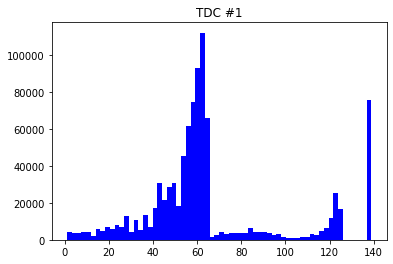

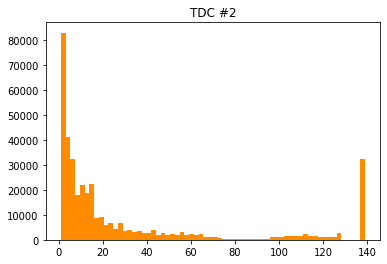

In [21]:
df2 = df.groupby("FPGA")["TDC_CHANNEL"]
plt.figure()
plt.hist(df2.get_group(0).values[:], bins = 64, color = "blue")
plt.title("TDC #1")
plt.figure()
plt.title("TDC #2")
plt.hist(df2.get_group(1).values[:], bins = 64, color = "darkorange")

#### A more straightforward solution:

FPGA
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TDC_CHANNEL, dtype: object

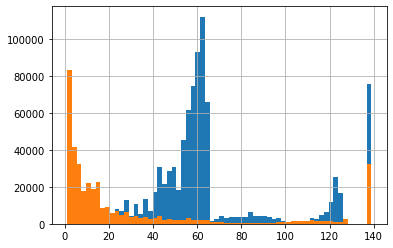

In [22]:
df.groupby("FPGA")["TDC_CHANNEL"].hist(bins = 64)